In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
import pickle
from tensorflow.keras.models import load_model

#with open("/Users/tim/Desktop/postgraduate/semester 2/machine learning 2/assessment_project/model.h5/ensemble and weight/model_weights.pkl", "rb") as f:
#    model_weights = pickle.load(f)

#models = []
#for i in range(len(model_weights)):
#    model = load_model(f"/Users/tim/Desktop/postgraduate/semester 2/machine learning 2/assessment_project/model.h5/ensemble and weight/model_{i}.h5")
#    models.append(model)

#Load the saved model
model = keras.models.load_model('/Users/tim/Desktop/postgraduate/semester 2/machine learning 2/assessment_project/model.h5/keras tuner 50 trials/keras_tuner_model_50trials.h5')

#Print model architecture
print("Model architecture:")
print(model.summary())



Model architecture:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 240, 320, 25  37888       ['input_1[0][0]']                
                                6)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 120, 160, 25  0           ['conv2d[0][0]']                 
                                6)                                        

32/32 [==============================] - 14s 406ms/step


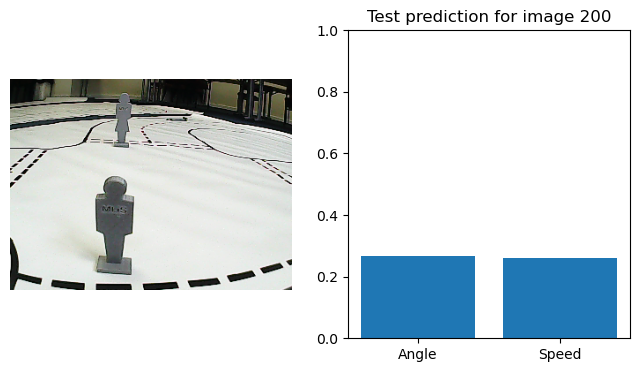

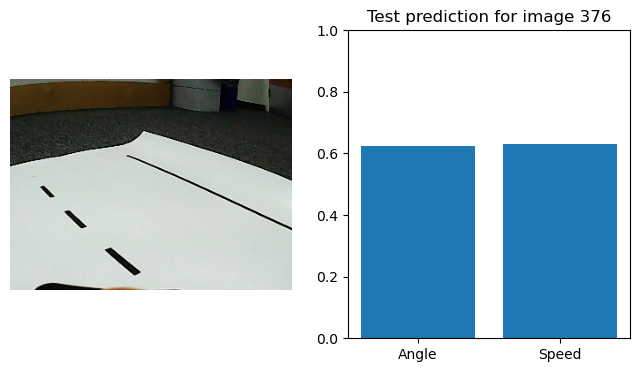

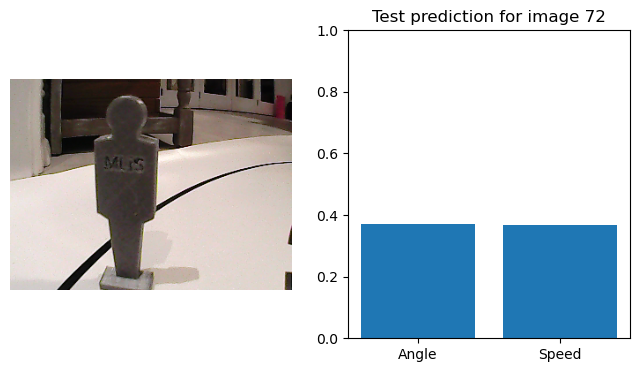

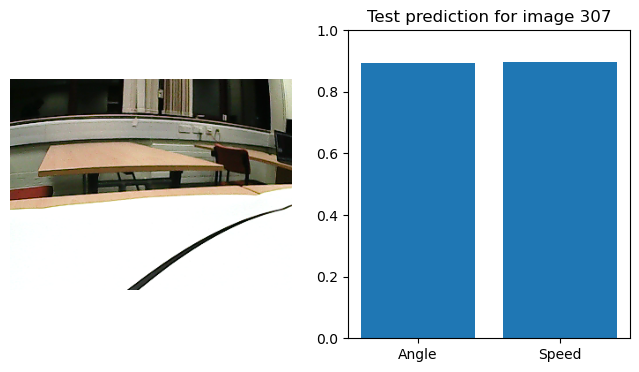

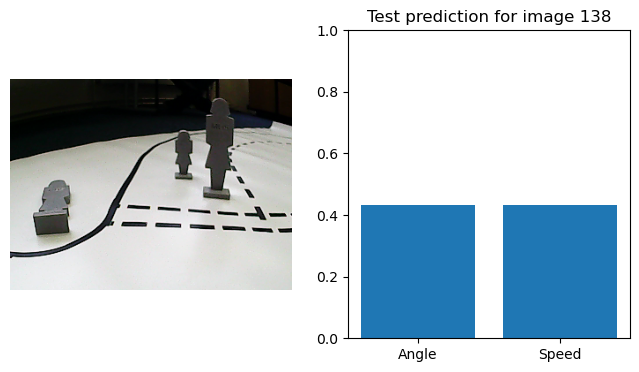

In [8]:
# load test dataset
test_images = []
for i in range(1, 1021):
    image = cv2.imread(f'/Users/tim/Desktop/postgraduate/semester 2/machine learning 2/assessment_project/machine-learning-in-science-ii-2023/test_data/test_data/{i}.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test_images.append(image)
test_images = np.array(test_images)
test_ids = np.arange(1, 1021)
test_predictions = model.predict(test_images)

import matplotlib.pyplot as plt

def display_test_predictions(test_images, test_predictions, num_images=5):
    indices = np.random.choice(len(test_images), num_images)

    for i, index in enumerate(indices):
        image = test_images[index]
        angle_prediction = test_predictions[0][index][0]
        speed_prediction = test_predictions[1][index][0]
        
    

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.bar(['Angle', 'Speed'], [angle_prediction, speed_prediction])
        plt.ylim(0, 1)
        plt.title(f"Test prediction for image {index + 1}")
        plt.show()

display_test_predictions(test_images, test_predictions)


In [9]:
#  load train dataset
train_df = pd.read_csv('/Users/tim/Desktop/postgraduate/semester 2/machine learning 2/assessment_project/machine-learning-in-science-ii-2023/training_norm.csv')
train_images = []
for image_id in train_df['image_id']:
    image = cv2.imread(f'/Users/tim/Desktop/postgraduate/semester 2/machine learning 2/assessment_project/machine-learning-in-science-ii-2023/training_data/training_data/{image_id}.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    train_images.append(image)
train_images = np.array(train_images)
train_angles = np.array(train_df['angle'])
train_speeds = np.array(train_df['speed'])

from sklearn.model_selection import train_test_split


X = train_images
y = np.column_stack((train_angles, train_speeds))


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

val_loss, val_angle_output_loss, val_speed_output_loss, val_angle_output_mae, val_speed_output_mae = model.evaluate(X_val, [y_val[:, 0], y_val[:, 1]], verbose=0)


87/87 [==============================] - 209s 2s/step


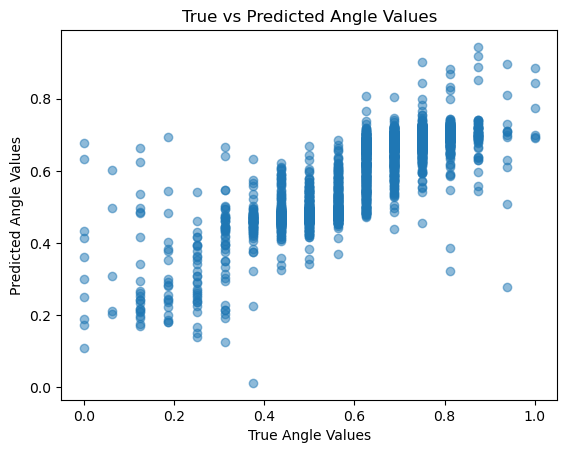

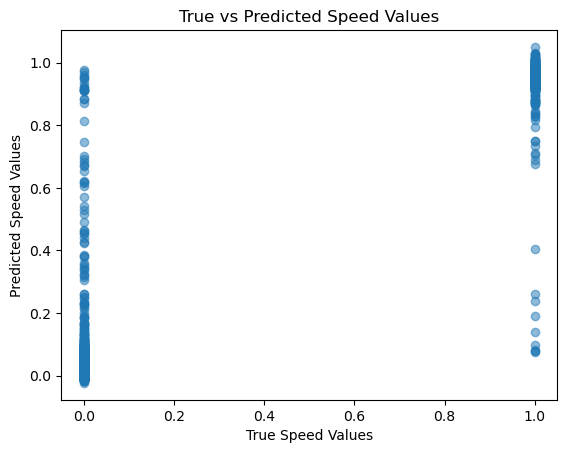

In [10]:
y_pred = model.predict(X_val)  # Replace X_val with your dataset
y_true = y_val  # Replace y_val with your ground truth labels

# Plot true vs predicted values for angle output
plt.scatter(y_true[:, 0], y_pred[0].flatten(), alpha=0.5)
plt.xlabel("True Angle Values")
plt.ylabel("Predicted Angle Values")
plt.title("True vs Predicted Angle Values")
plt.show()

# Plot true vs predicted values for speed output
plt.scatter(y_true[:, 1], y_pred[1].flatten(), alpha=0.5)
plt.xlabel("True Speed Values")
plt.ylabel("Predicted Speed Values")
plt.title("True vs Predicted Speed Values")
plt.show()


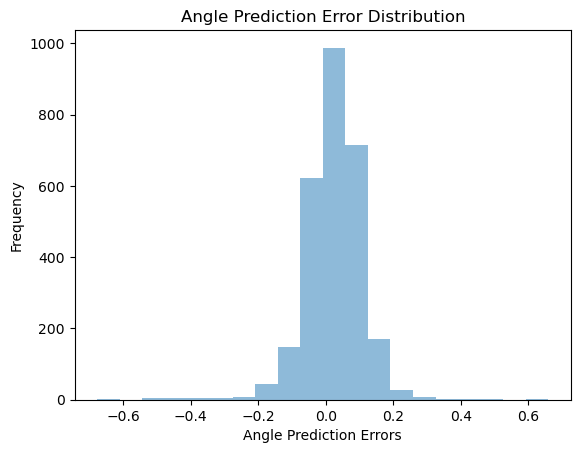

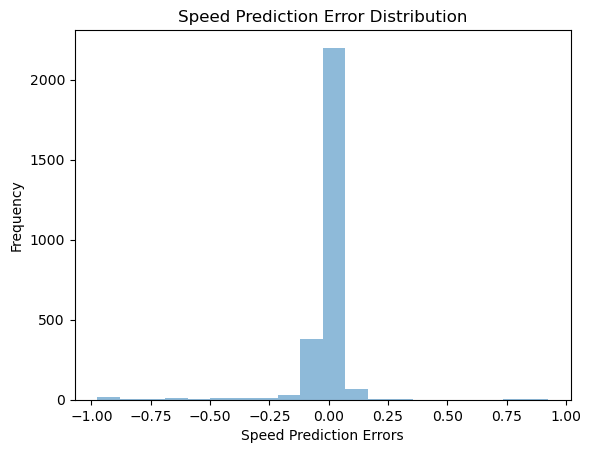

In [11]:
angle_errors = y_true[:, 0] - y_pred[0].flatten()
speed_errors = y_true[:, 1] - y_pred[1].flatten()

# Plot error distribution for angle output
plt.hist(angle_errors, bins=20, alpha=0.5)
plt.xlabel("Angle Prediction Errors")
plt.ylabel("Frequency")
plt.title("Angle Prediction Error Distribution")
plt.show()

# Plot error distribution for speed output
plt.hist(speed_errors, bins=20, alpha=0.5)
plt.xlabel("Speed Prediction Errors")
plt.ylabel("Frequency")
plt.title("Speed Prediction Error Distribution")
plt.show()


In [4]:
import tensorflow as tf

# Load the TFLite model
tflite_model_path = 'model.tflite'
interpreter = tf.lite.Interpreter(model_path='/Users/tim/Desktop/postgraduate/semester 2/machine learning 2/assessment_project/model.h5/15 epoch nn/15_epoch_nn_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Details:", input_details)
print("Output Details:", output_details)

# Check the number of inputs and outputs
print("Number of inputs:", len(input_details))
print("Number of outputs:", len(output_details))


Input Details: [{'name': 'serving_default_speed_input:0', 'index': 0, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'serving_default_image_input:0', 'index': 1, 'shape': array([  1, 240, 320,   3], dtype=int32), 'shape_signature': array([ -1, 240, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'serving_default_angle_input:0', 'index': 2, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': arra

INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


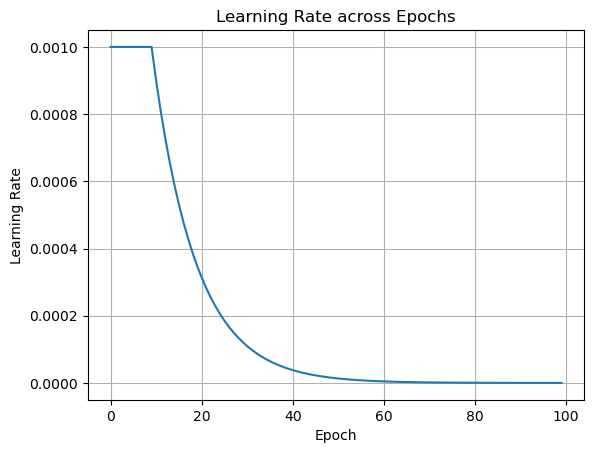

In [12]:
initial_lr = 0.001  # The initial learning rate
n_epochs = 100  # The total number of epochs

# Create a list of learning rates
learning_rates = [initial_lr]*10 + [initial_lr*(0.9**i) for i in range(1, n_epochs-10+1)]

# Plot the learning rates
plt.plot(learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate across Epochs')
plt.grid(True)
plt.show()


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load true values from training data
train_df = pd.read_csv('data/training_norm.csv')

# Load predictions
submission_df = pd.read_csv('submission_modified.csv')

# Merge predictions with true values
merged_df = train_df.merge(submission_df, on='image_id', suffixes=('_true', '_pred'))

# Compute evaluation metrics
angle_mse = mean_squared_error(merged_df['angle_true'], merged_df['angle_pred'])
angle_mae = mean_absolute_error(merged_df['angle_true'], merged_df['angle_pred'])
angle_r2 = r2_score(merged_df['angle_true'], merged_df['angle_pred'])

speed_mse = mean_squared_error(merged_df['speed_true'], merged_df['speed_pred'])
speed_mae = mean_absolute_error(merged_df['speed_true'], merged_df['speed_pred'])
speed_r2 = r2_score(merged_df['speed_true'], merged_df['speed_pred'])

print("Angle Prediction Metrics:")
print(f"  MSE: {angle_mse:.4f}, MAE: {angle_mae:.4f}, R² Score: {angle_r2:.4f}")
print("Speed Prediction Metrics:")
print(f"  MSE: {speed_mse:.4f}, MAE: {speed_mae:.4f}, R² Score: {speed_r2:.4f}")

# Visualization: True vs Predicted values for angle
plt.figure(figsize=(12, 5))
plt.scatter(merged_df['angle_true'], merged_df['angle_pred'], alpha=0.5)
plt.plot([merged_df['angle_true'].min(), merged_df['angle_true'].max()],
         [merged_df['angle_true'].min(), merged_df['angle_true'].max()],
         color='red', linestyle='dashed')
plt.xlabel("True Angle")
plt.ylabel("Predicted Angle")
plt.title("True vs Predicted Angle")
plt.grid(True)
plt.show()

# Visualization: True vs Predicted values for speed
plt.figure(figsize=(12, 5))
plt.scatter(merged_df['speed_true'], merged_df['speed_pred'], alpha=0.5)
plt.plot([merged_df['speed_true'].min(), merged_df['speed_true'].max()],
         [merged_df['speed_true'].min(), merged_df['speed_true'].max()],
         color='red', linestyle='dashed')
plt.xlabel("True Speed")
plt.ylabel("Predicted Speed")
plt.title("True vs Predicted Speed")
plt.grid(True)
plt.show()

# Error distribution
plt.figure(figsize=(12, 5))
plt.hist(merged_df['angle_true'] - merged_df['angle_pred'], bins=30, alpha=0.7, label='Angle Error')
plt.hist(merged_df['speed_true'] - merged_df['speed_pred'], bins=30, alpha=0.7, label='Speed Error')
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.legend()
plt.grid(True)
plt.show()
